<a href="https://colab.research.google.com/github/Nur-ayn/DSI/blob/main/DSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science with Pandas**

This colab can be found on my github along with the answer for Question 1 in [this repo](https://github.com/Nur-ayn/DSI)

# Reading in Files

In [1]:
import pandas as pd
from google.colab import drive

pd.set_option('display.max_columns', 500)
drive.mount('/content/gdrive', force_remount=True)

files = ['title.akas.tsv.gz',
         'title.basics.tsv.gz',
         'title.ratings.tsv.gz']

dataframes = []

for file in files:
  df = pd.read_csv(f"/content/gdrive/MyDrive/datasets/{file}", compression='gzip', sep='\t')
  dataframes.append(df)


Mounted at /content/gdrive


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Merging Dataframes

In [2]:
for df in dataframes:
  df.drop_duplicates(inplace=True)

akas, basics, ratings = dataframes[0], dataframes[1], dataframes[2]


In [3]:
pd.set_option('display.max_columns', 20)

big_df_inner = akas.merge(basics, how='inner', left_on='titleId', right_on='tconst') \
               .merge(ratings, how='inner', left_on='titleId', right_on='tconst')
big_df_outer = akas.merge(basics, how='outer', left_on='titleId', right_on='tconst') \
               .merge(ratings, how='outer', left_on='titleId', right_on='tconst')
print(big_df_inner)
print(big_df_outer)

           titleId  ordering                         title region language  \
0        tt0000001         1     Carmencita - spanyol tánc     HU       \N   
1        tt0000001         2                    Карменсита     RU       \N   
2        tt0000001         3                    Carmencita     US       \N   
3        tt0000001         4                    Carmencita     \N       \N   
4        tt0000002         1        Le clown et ses chiens     \N       \N   
...            ...       ...                           ...    ...      ...   
1686542  tt9100068         2               Птичий праздник   SUHH       ru   
1686543  tt9100098         1           Малиновка и медведь   SUHH       ru   
1686544  tt9100098         2            Malinovka i medved     \N       \N   
1686545  tt9100972         1  Kogda Medvezhonok prosnetsya     \N       \N   
1686546  tt9100972         2    Когда Медвежонок проснется   SUHH       ru   

               types attributes isOriginalTitle   tconst_x titl

An inner merge only retains rows where the column in one table (eg titleId) has a match with another column (eg tconst) in another table. An outer merge will still retain the rows where a match cannot be found between the tables and will fill in any empty columns with a NaN.  Consequently, the outer merge has considerably more rows than the inner merge.

In [5]:
unique_title_types = big_df_inner['titleType'].unique()
num_unique_title_types = big_df_inner['titleType'].nunique()
print(f"The {num_unique_title_types} unique title types are {', '.join(unique_title_types)}")


The 10 unique title types are short, movie, tvMovie, tvSeries, tvEpisode, tvShort, tvMiniSeries, tvSpecial, video, videoGame


# Filtering Data

In [14]:
df_new = big_df_inner.loc[ ((big_df_inner['language'] == 'en') | (big_df_inner['region'] == 'US')) & (big_df_inner['titleType'] == 'movie') ]
print(df_new.head())


        titleId  ordering                           title region language  \
51    tt0000009         3                      Miss Jerry     US       \N   
574   tt0000147         1   The Corbett-Fitzsimmons Fight     US       \N   
1446  tt0000630         4                          Hamlet     US       \N   
1520  tt0000679         1  The Fairylogue and Radio-Plays     US       \N   
1797  tt0000886         2       Hamlet, Prince of Denmark     US       \N   

     types attributes isOriginalTitle   tconst_x titleType  \
51      \N         \N               0  tt0000009     movie   
574     \N         \N               0  tt0000147     movie   
1446    \N         \N               0  tt0000630     movie   
1520    \N         \N               0  tt0000679     movie   
1797    \N         \N               0  tt0000886     movie   

                        primaryTitle                   originalTitle  isAdult  \
51                        Miss Jerry                      Miss Jerry        0   
57

In [15]:
 import numpy as np
 
 df_new['log10Votes'] = np.log10(df_new['numVotes'])
 df_new['genres'] = df_new['genres'].str.lower()
 print(df_new)

           titleId  ordering                               title region  \
51       tt0000009         3                          Miss Jerry     US   
574      tt0000147         1       The Corbett-Fitzsimmons Fight     US   
1446     tt0000630         4                              Hamlet     US   
1520     tt0000679         1      The Fairylogue and Radio-Plays     US   
1797     tt0000886         2           Hamlet, Prince of Denmark     US   
...            ...       ...                                 ...    ...   
1686422  tt9020894         4              Temporary Difficulties     US   
1686485  tt9056646         3                              Bearer    XWW   
1686494  tt9060058         3              The Wind Sculpted Land    XWW   
1686520  tt9081472         2         Physicians of Aickarakkonam     IN   
1686522  tt9081572         2  What Have We Done to Deserve This?    XWW   

        language        types             attributes isOriginalTitle  \
51            \N           

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Grouping Data

In [16]:
import numpy as np

top10_by_votes = df_new.groupby('genres')['log10Votes'].mean().nlargest(10)
print(f"The top 10 genres by votes are \n {top10_by_votes}")
top10_by_rating = df_new.groupby('genres')['averageRating'].mean().nlargest(10)
print(f"The top 10 genres by rating are \n {top10_by_rating}")


The top 10 genres by votes are 
 genres
action,fantasy,war            5.405722
action,family,romance         4.801753
animation,drama,war           4.396304
family,music,musical          4.396252
documentary,sport,thriller    4.386731
action,adventure,sci-fi       4.373261
horror,musical,sci-fi         4.340484
biography,fantasy,horror      4.271842
adventure,sci-fi,thriller     4.180897
adventure,drama,sci-fi        4.123983
Name: log10Votes, dtype: float64
The top 10 genres by rating are 
 genres
documentary,history,western        9.300000
history,sport                      9.200000
documentary,news,reality-tv        8.800000
animation,crime,documentary        8.525000
biography,history,music            8.500000
adventure,documentary,western      8.433333
documentary,drama,thriller         8.433333
comedy,mystery,sport               8.400000
action,documentary,fantasy         8.300000
biography,documentary,talk-show    8.300000
Name: averageRating, dtype: float64


The first method of grouping looks at combinations of genres instead of each genre individually.  To look at genres individually, we can split the strings in the genres column and then explode the votes or ratings so that it applies to each of the genres that a title belongs to. This is done below.

In [34]:
array_genres = df_new['genres'].apply(lambda x: x.split(','))

top10_by_votes = df_new.log10Votes.repeat(array_genres.str.len()).groupby(np.concatenate(array_genres)).mean().nlargest(10)
top10_by_rating = df_new.averageRating.repeat(array_genres.str.len()).groupby(np.concatenate(array_genres)).mean().nlargest(10)
print(top10_by_votes)
print(top10_by_rating)

sci-fi       2.926363
film-noir    2.879454
animation    2.878476
fantasy      2.797974
adventure    2.775299
mystery      2.704150
thriller     2.699707
action       2.644901
crime        2.615538
horror       2.598428
Name: log10Votes, dtype: float64
news           7.285511
documentary    7.266744
talk-show      7.100000
biography      7.051540
history        6.907194
music          6.728509
film-noir      6.723836
reality-tv     6.673333
sport          6.582902
war            6.576670
Name: averageRating, dtype: float64


    averageRating  log10Votes
0             1.0    1.725042
1             1.1    2.094683
2             1.2    2.271564
3             1.3    2.016823
4             1.4    1.891898
..            ...         ...
86            9.6    1.504343
87            9.7    1.321140
88            9.8    0.778151
89            9.9    1.447158
90           10.0    0.758356

[91 rows x 2 columns]


Text(0, 0.5, 'average rating')

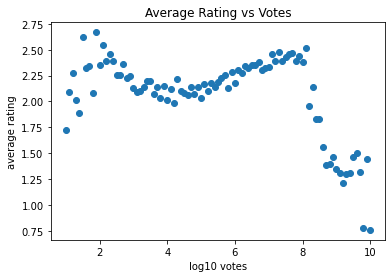

In [58]:
import matplotlib.pyplot as plt

avg_rating_vs_votes = df_new.groupby('averageRating')['log10Votes'].mean()
print(avg_rating_vs_votes.reset_index())

average_rating = avg_rating_vs_votes.reset_index()['averageRating']
log10_votes = avg_rating_vs_votes.reset_index()['log10Votes']

fig, ax = plt.subplots()

ax.scatter(average_rating, log10_votes)
ax.set_title('Average Rating vs Votes')
ax.set_xlabel('log10 votes')
ax.set_ylabel('average rating')

# Using ML Libraries to Perform Linear Regression

[-0.07894134]
2.5105531440478193


/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


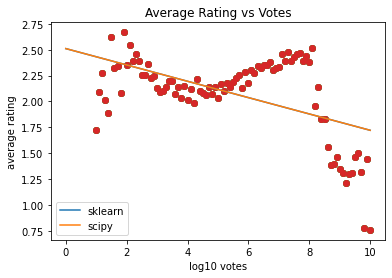

In [61]:
ax.scatter(average_rating, log10_votes)
ax.set_title('Average Rating vs Votes')
ax.set_xlabel('log10 votes')
ax.set_ylabel('average rating')

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(average_rating.to_numpy().reshape(-1, 1), log10_votes)
print(model.coef_)
print(model.intercept_)
x = np.linspace(0, 10, 100)
y = model.coef_[0]*x + model.intercept_

ax.plot(x,y, label='sklearn')

from scipy import stats

model = stats.linregress(average_rating, log10_votes)
y = model.slope*x + model.intercept
ax.plot(x, y, label='scipy')

import torch

class LinearRegressionModel(torch.nn.Module):
 
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out
 
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearRegressionModel()
loss = torch.nn.MSELoss(size_average = False)
optimiser = torch.optim.SGD(model.parameters(), lr = 0.01)

ax.legend()
fig